# My Captstone Assignment 9
*Medical Price Prediction
*Uses a Kagle Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/MyST1-CapstoneProject


/content/drive/MyDrive/MyST1-CapstoneProject


In [ ]:
!ls /content/drive/MyDrive/MyST1-CapstoneProject

Boats_Cleaned_dataset.csv  DataForML.pkl  Final_XGB_Model.pkl  Medical_insurance.csv


*This Prject is based on the Medical Insurance Price Data available from Kaggle repository.
https://www.kaggle.com/datasets/harishkumardatalab/medical-insurance-price-prediction?resource=download



*   The dataset contains 2.7K rows and 7 columns
*   The medical insurance dataset contains information about a number of factors that can affect medical expenses, including age, sex, BMI, smoking status, number of children, and region.
*   For solving this problem,i will approach to create a data analysis and prediction model bassed on (Machine Learning/ AI algorithms, regression algorith for instance) from different Python packagec, modules and clases.
*   My Project Task is to predict the Medical Insurence Price using machine learning model



# Step 1: Reading the Dataset With Python
This is one of  the most important steps in data analysis.
You must uderstand the data and the domain well before trying to apply any machine learinig algorithm

In [ ]:
#Supressing warning messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Reading the datasets using pandas and numpy
#pandas is python library written for data manipulation and analysis
#numpy is a python library for adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

import pandas as pd
import numpy as np

#reading the dataset
MedicalInsuranceData = pd.read_csv('/content/drive/MyDrive/MyST1-CapstoneProject/Medical_insurance.csv', encoding='latin')

#shape of the dataset with redundant data
print('Shapes before deleting duplicate values', MedicalInsuranceData.shape)

#Removing redundant data
MedicalInsuranceData.drop_duplicates()
print('Shapes after deleting duplicate vales', MedicalInsuranceData.shape)

#print sample data
#start observing the Quantitative/Categorical/Quantitative Variblees

#lets print the first 10 dataset
MedicalInsuranceData.head(10)

Shapes before deleting duplicate values (2772, 7)
Shapes after deleting duplicate vales (2772, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


*Key Observations from Step1 About Data Description

*   This dataset consists of 2772 different insurence charges of different
 with different range of patient
*   There are 7 attributs and they are outlined below.


1.   age
2.   sex
3.   bmi - body mass index
4.   children
5.   smoker
6.   region
7.   charges






# Step 2: Problem Statement Definition

*   Creating a predication model to predict the charges(Medical Insurance Price)
*   Target Variable: charges
*   Features: age, sex, bmi, children, smoker, region



# Step 3: Choosing the appropriate ML/AI algorithm for Data Analysis

* Based on the problem statement we need to create a supervised ML Regression model, as the target variable is **Continuous**.


# Step 4: Looking at the class distribution (Target variable distribution to check if the data is balanced or skewed.
* If target variable's distribution is too skewed then the predictive modeling will lead to poor results.
* Ideally Bell curve is desirable but slightly positive skew or negative skew is also fine.
* When performing Regression algorithm modelling and analysis, we need to make sure the histogram looks like a bell curve or slight skewed version of it.
* Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios from the data.

<Axes: >

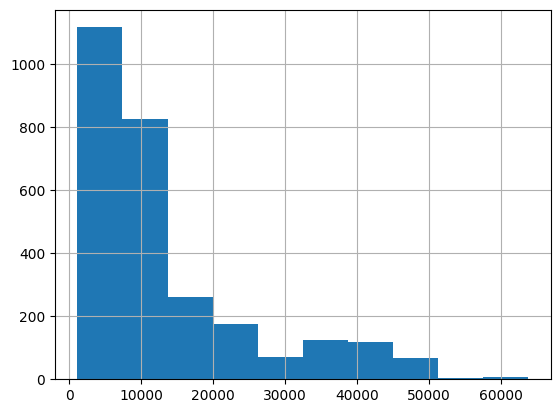

In [ ]:
%matplotlib inline
# Creating histogram as the Target variable is Continuous
# This will help us to understand the distribution of the chages values
MedicalInsuranceData['charges'].hist()

# Observations from Step 4


*   Majority of the insurance price ranges from 0-10000
* The data distribution of the target variable is not balanced and  is right skewed, hence we cannot proceed further before we get a desireable bell curve




# Data Trimming
In order to get a satisfactory bell curve i will be removing the the tail of the graph. That means i will exclude all "charges below 30000"

<Axes: >

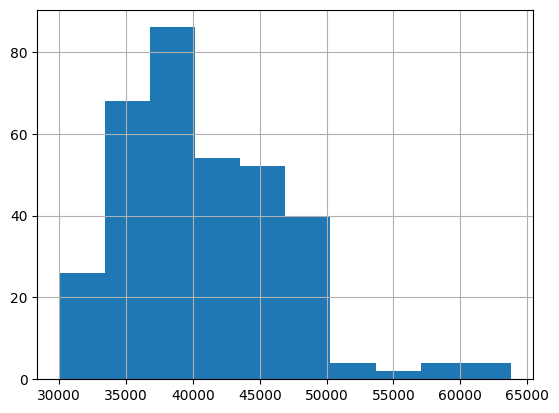

In [ ]:
# Filter the data

MedicalInsuranceData = MedicalInsuranceData[MedicalInsuranceData['charges'] >= 30000]
MedicalInsuranceData['charges'].hist()


Now we have a satisfactory bell curve and can proceed further with data analysis

## Step 5: Basic Exploratory Data Analysis
* This step is performed to guage the overall data.
* The volume of data, the types of columns present in the data.
* Initial assessment of the data should be done to identify which columns are Quantitative, Categorical or Qualitative.

* This step helps to start the column/data rejection process.
* You must look at each column carefully and ask, does this column affect the values of the Target variable/Class?
* For example in this dataset, you will ask, does this column affect the price of the house?
* If the answer is a clear "No", then remove the column immediately from the data, otherwise keep the column for further analysis.

* There are four commands which are used for Basic data exploratory Analysis in Python

* head() : This helps to see a few sample rows of the data
* info() : This provides the summarized information of the data
* describe() : This provides the descriptive statistical details of the data
* nunique(): This helps us to identify if a column is categorical or continuous

In [ ]:
# Looking at sample rows in the data
MedicalInsuranceData.head()

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768
29,31,male,36.30,2,yes,southwest,38711.0000
30,22,male,35.60,0,yes,southwest,35585.5760


In [ ]:
# Looking at sample rows in the data
MedicalInsuranceData.tail()

,age,sex,bmi,children,smoker,region,charges
2736,64,male,36.960,2,yes,southeast,49577.66240
2744,32,male,33.630,1,yes,northeast,37607.52770
2755,44,male,29.735,2,no,northeast,32108.66282
2764,22,female,31.020,3,yes,southeast,35595.58980
2765,47,male,36.080,1,yes,southeast,42211.13820


In [ ]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
MedicalInsuranceData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340 entries, 14 to 2765
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       340 non-null    int64  
 1   sex       340 non-null    object 
 2   bmi       340 non-null    float64
 3   children  340 non-null    int64  
 4   smoker    340 non-null    object 
 5   region    340 non-null    object 
 6   charges   340 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 21.2+ KB


In [ ]:
# Looking at the descriptive statistics of the data
MedicalInsuranceData.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,340.000000,340,340.000000,340.000000,340,340,340.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,yes,southeast,NaN
freq,NaN,220,NaN,NaN,318,132,NaN
mean,40.347059,NaN,34.891853,1.176471,NaN,NaN,40730.303800
std,14.403892,NaN,4.711178,1.130708,NaN,NaN,6130.972409
min,18.000000,NaN,17.765000,0.000000,NaN,NaN,30063.580550
25%,27.000000,NaN,31.680000,0.000000,NaN,NaN,36197.699000
50%,42.000000,NaN,34.750000,1.000000,NaN,NaN,39805.397650
75%,52.000000,NaN,37.050000,2.000000,NaN,NaN,44501.398200


From observation of the descriptive statistics of the data, we can see that no normalization or standardisation is required

In [ ]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
MedicalInsuranceData.nunique()

age          46
sex           2
bmi         127
children      5
smoker        2
region        4
charges     162
dtype: int64

## Observations from Step 5 - Basic Exploratory Data Analysis
 Based on the basic exploration above, i can conclude that



* age - Continuous. Selected.
* sex - Categorical. Selected.
* bmi - Continuous. Selected.
* children - Categorical. Selected.
* smoker - Categorical. Selected.
* region - Categorical. Selected.
* charges - Continuous. Selected. This is the Target or Class Variable, which needs to be predicted by the proposed regression model!

** The selected columns in this step are not final, further study will be done and then a final list will be created **

## Step 7: Removing Unwanted columns
* There are no qualitative columns in the data.
* Hence no need to remove any column.

## Step 8: Visual Exploratory Data Analysis
* Visualize distribution of all the Categorical Predictor variables in the data using bar plots
* We can spot a categorical variable in the data by looking at the unique values in them.
* Typically a categorical variable contains less than 20 Unique values AND there is repetition of values, which means the data can be grouped by those unique values.
* Based on the Basic Exploration Data Analysis in the previous step,  we could spotted two categorical predictors in the data

* Categorical Predictors:

* 'sex'
* 'children'
* 'smoker'
* 'region'

* We will use bar charts to see how the data is distributed for these categorical columns.

In [ ]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline

    import matplotlib.pyplot as plt

    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

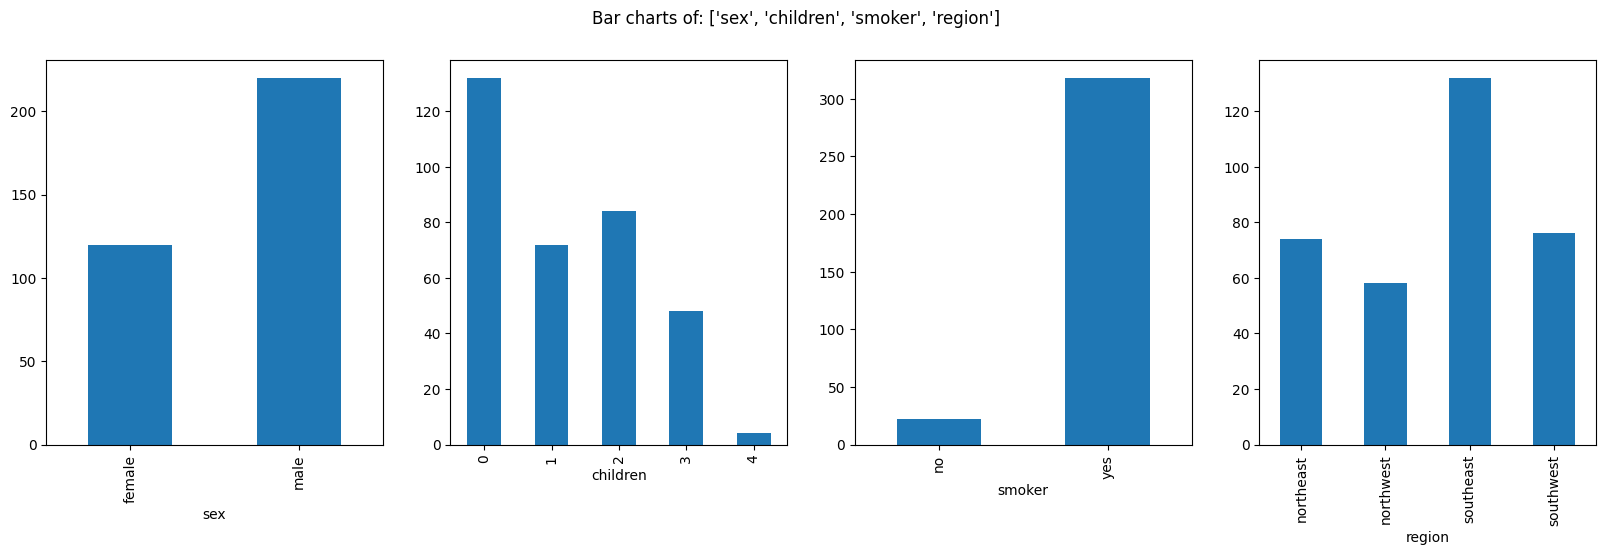

In [ ]:
# Calling the function PlotBarCharts() we have created
PlotBarCharts(inpData=MedicalInsuranceData, colsToPlot=['sex','children','smoker', 'region'])

## Observations from Step 8 - Visual Exploratory Data Analysis
* Bar Charts have allowed interpretation on the two data columns
* The bar charts represent the frequencies of each category in the Y-axis and the category names in the X-axis.
* 'Smoker' column shows too skewed distribution where there is only one dominant bar and the other categories are present in very low numbers.
* Selected Categorical Variables (**'sex', 'children' ,'smoker',  'region'**): All categorical variables are selected for further analysis.

## Step 9: Now Visualize distribution of all the Continuous Predictor variables in the data using histograms
* Based on the Basic Exploratory Data Analysis, there are six continuous predictor variables 'age', 'sex', 'bmi', 'children', 'smoker' and 'region'

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>]],
      dtype=object)

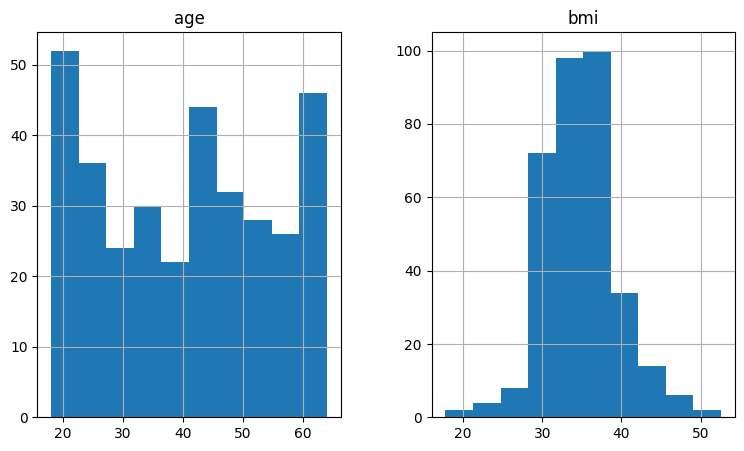

In [ ]:
# Plotting histograms of multiple columns together
MedicalInsuranceData.hist(['age', 'bmi'], figsize=(9,5))

## Observations from Step 9
* Histogram Interpretation
* Each histograms shows us the data distribution for a single continuous variable.

* The X-axis shows the range of values and Y-axis represent the number of values in that range.
* For example, in the above histogram of "bmi", there are around 70 rows in data that has age value between 0 to 20.

* Selected Continuous Variables:

* age : Selected.
* bmi: Selected. The distribution is good.


## Step 12: Missing Values Analysis

* Missing values are treated for each column separately.
* If a column has more than 30% data missing, then missing value treatment cannot be done.
* That column must be rejected because too much information is missing.
* Outlined below are some options for treating missing values in data.
* Delete the missing value rows if there are only few records
* Impute the missing values with MEDIAN value for continuous variables
* Impute the missing values with MODE value for categorical variables
* Interpolate the values based on nearby values
* Interpolate the values based on business logic

In [ ]:
# Finding how many missing values are there for each column
MedicalInsuranceData.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##Observations from Step 12: Missing Value Analysis
* No missing values in this data!
* So no removal of any data samples(rows) is needed.


## Step 13: Feature Selection (Attribute Selection)

 **For this dataset, the Target variable is Continuous, hence following two scenarios will need attention**

* Continuous Target Variable Vs Continuous Predictor
* Continuous Target Variable Vs Categorical Predictor

## Relationship exploration: Continuous Vs Continuous -- Scatter Charts
* When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using a metric called pearson's correlation value.

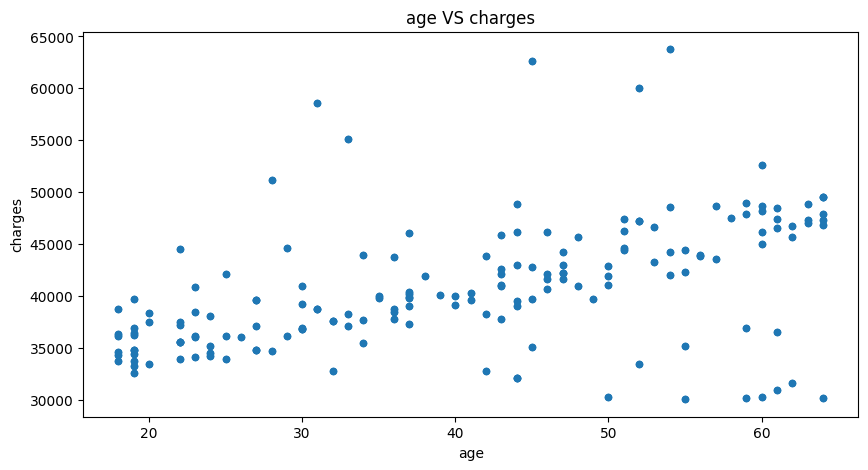

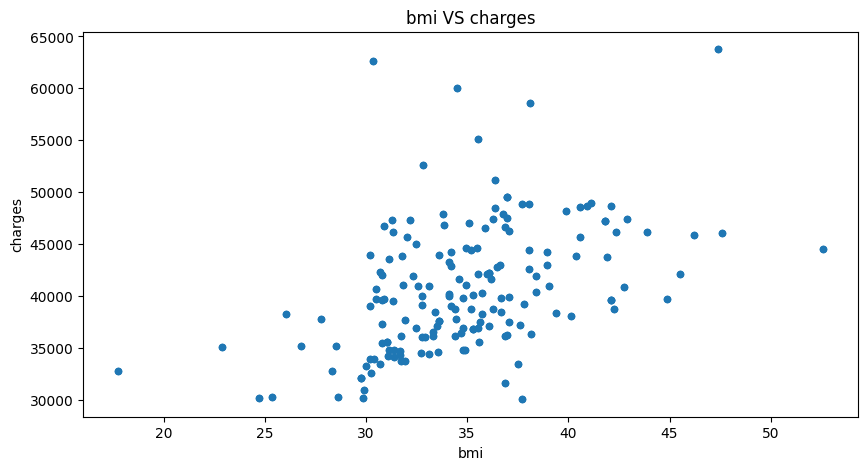

In [ ]:
ContinuousCols = ['age', 'bmi']

#Plotting scatter chart for each predicator vs target varialbe
for predictor in ContinuousCols:
    MedicalInsuranceData.plot.scatter(x=predictor, y='charges', figsize=(10,5), title=predictor+" VS "+ 'charges')

## Scatter charts interpretation

There is a hint of slight positively correlated in the age vs charges graph but no clear trend

There is no correlation in bmi vs charges graph

# Step 14: Statistical Feature Selection (Continuous Vs Continuous) using Correlation value

* Correlation between [-1,0) means inversely proportional, the scatter plot will show a downward trend
* Correlation between (0,1] means directly proportional, the scatter plot will show a upward trend
* Correlation near {0} means No relationship, the scatter plot will show no clear trend.
* If Correlation value between two variables is > 0.5 in magnitude, it indicates good relationship the sign does not matter
* We observe the correlations between Target variable and all other predictor variables(s) to check which columns/features/predictors are actually related to the target variable in question.

In [ ]:
#Calculating correlation marix
ContinuousCols = ['age', 'bmi', 'charges']

# Creating the correlation matrix
CorrelationData=MedicalInsuranceData[ContinuousCols].corr()
CorrelationData

,age,bmi,charges
age,1.000000,-0.036853,0.471721
bmi,-0.036853,1.000000,0.454957
charges,0.471721,0.454957,1.000000


In [ ]:
# Filtering only those columns where absolute correlation > 0.3 with Target Variable
# reduce the 0.5 threshold to 0.3 since no variable was selected
CorrelationData['charges'][abs(CorrelationData['charges']) > 0.3 ]

age        0.471721
bmi        0.454957
charges    1.000000
Name: charges, dtype: float64

## Observations from Step 14
Final selected Continuous columns:
**age**

# Step 15:  Relationship exploration: Categorical Vs Continuous -- Box Plots
* When the target variable is Continuous and the predictor variable is Categorical we analyze the relation using Boxplots,  and
* Measure the strength of relation using Anova test.

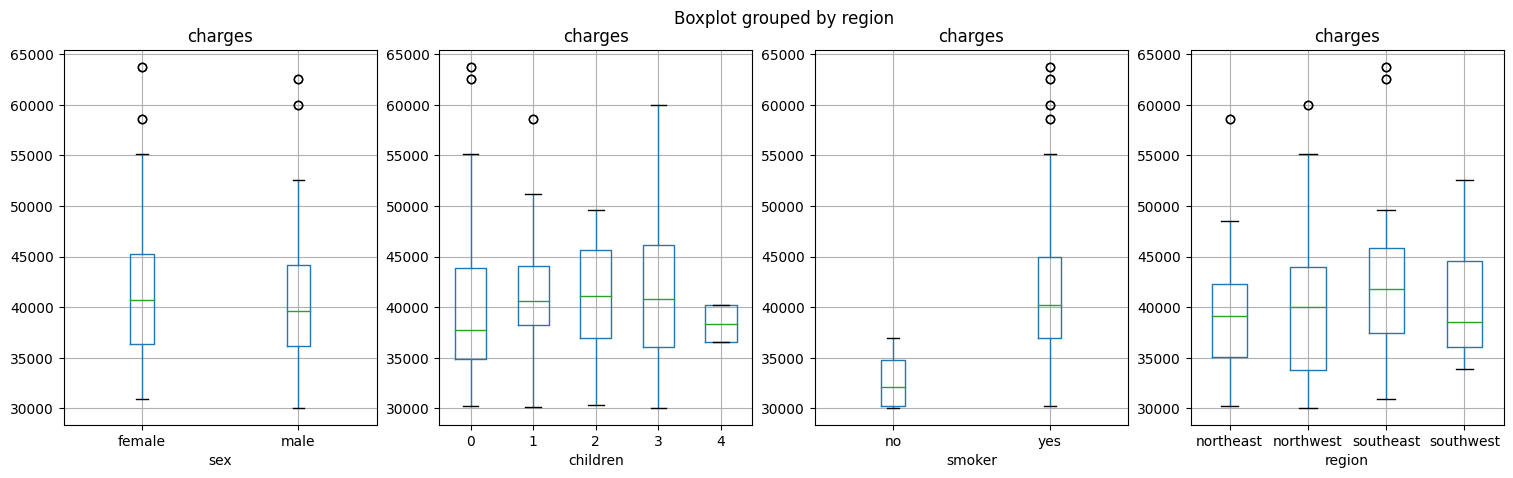

In [ ]:
# Box plots for continuous Target Variable "MEDV" and Categorical predictors
CategoricalColsList=['sex', 'children', 'smoker', 'region']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(CategoricalColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "MEDV"
for PredictorCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    MedicalInsuranceData.boxplot(column='charges', by=PredictorCol, figsize=(5,5), vert=True, ax=PlotCanvas[i])

##Observations from Step 15: Box-Plots interpretation

For this datadata, all the categorical predictors looks correlated with the Target variable.

We confirm this by looking at the results of ANOVA test below

## Step 16: Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test



In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)

        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])


In [ ]:
#Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['sex', 'children', 'smoker', 'region']
FunctionAnova(inpData=MedicalInsuranceData,
              TargetVariable='charges',
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

sex is NOT correlated with charges | P-Value: 0.2694613711391712
children is NOT correlated with charges | P-Value: 0.4951088181875468
smoker is correlated with charges | P-Value: 3.677549392733325e-11
region is correlated with charges | P-Value: 0.021437834075891657


##Observations from Step 16
* The results of ANOVA confirm our visual analysis using box plots above.

* All categorical variables are correlated with the Target variable.

* Final selected Categorical columns:

'sex', 'children', 'smoker', 'region'

## Selecting final Predictors/Features for building Machine Learning/AI model.
* Based on the extensive tests with exploratory data analysis, we can select the final features/predictors/columns for machine learning model building as:
* **'age', 'sex', 'children','smoker', 'region'**


In [ ]:
SelectedColumns=['age', 'sex', 'children','smoker', 'region']

# Selecting final columns
DataForML=MedicalInsuranceData[SelectedColumns]
DataForML.head()

,age,sex,children,smoker,region
14,27,male,0,yes,southeast
19,30,male,0,yes,southwest
23,34,female,1,yes,northeast
29,31,male,2,yes,southwest
30,22,male,0,yes,southwest


In [ ]:
# Saving this final data subset for reference during deployment
DataForML.to_pickle('DataForML.pkl')

## Step 17: Data Pre-processing for Machine Learning Model Building or Model Development
* List of steps that needs to be performed on predictor variables before data can be used for machine learning

* Converting each Ordinal Categorical columns to numeric
* Converting Binary nominal Categorical columns to numeric using 1/0 mapping
* Converting all other nominal categorical columns to numeric using pd.get_dummies()
* Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks
* Converting the ordinal variable to numeric - In this data there is no Ordinal categorical variable.
* Converting the binary nominal variable to numeric using 1/0 mapping: There is no binary nominal variable in string format in this data


## Converting the nominal variable to numeric using get_dummies()

In [ ]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['charges']=MedicalInsuranceData['charges']

# Printing sample rows
DataForML_Numeric.head()

,age,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges
14,27,0,False,True,False,True,False,False,True,False,39611.7577
19,30,0,False,True,False,True,False,False,False,True,36837.4670
23,34,1,True,False,False,True,True,False,False,False,37701.8768
29,31,2,False,True,False,True,False,False,False,True,38711.0000
30,22,0,False,True,False,True,False,False,False,True,35585.5760


## Step 18: Machine Learning Model Development:
* Splitting the data into Training and Testing sample
* We dont use the full data for creating the model (training data).
* Some data is randomly selected and kept aside for checking how good the model is.
* This is known as Testing Data and the remaining data is called Training data on which the model is built.
* Typically 70% of data is used as Training data and the rest 30% is used as Tesing data.

In [ ]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['age', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'charges'],
      dtype='object')

In [ ]:
#Separate Target Variable and Predictor Variables
TargetVariable='charges'
Predictors=['age', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

## Step 19: Standardization/Normalization of data

In [ ]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(238, 10)
(238,)
(102, 10)
(102,)


In [ ]:
#Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# # Calculating the error for each row
TestingDataResults['age']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['age'])
MedianMAPE=np.median(TestingDataResults['age'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.4900792995673088

##### Model Validation and Accuracy Calculations ##########
        age  children  sex_female  sex_male  smoker_no  smoker_yes  \
0  0.782609      0.25         0.0       1.0        0.0         1.0   
1  0.130435      0.00         0.0       1.0        0.0         1.0   
2  0.565217      0.50         0.0       1.0        0.0         1.0   
3  0.152174      0.50         0.0       1.0        0.0         1.0   
4  0.891304      0.25         0.0       1.0        0.0         1.0   

   region_northeast  region_northwest  region_southeast  region_southwest  \
0               0.0               0.0               1.0               0.0   
1               0.0               0.0               0.0               1.0   
2               0.0               0.0               0.0               1.0   
3               0.0               0.0               1.0               0.0   
4               0.0               0.0               1.0               0.0   

      c

## Step 21: AdaBoost Algorithm For ML/AI model buildi

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=3),
                  learning_rate=0.04, n_estimators=100)
R2 Value: 0.5638154668898983

##### Model Validation and Accuracy Calculations ##########
        age  children  sex_female  sex_male  smoker_no  smoker_yes  \
0  0.782609      0.25         0.0       1.0        0.0         1.0   
1  0.130435      0.00         0.0       1.0        0.0         1.0   
2  0.565217      0.50         0.0       1.0        0.0         1.0   
3  0.152174      0.50         0.0       1.0        0.0         1.0   
4  0.891304      0.25         0.0       1.0        0.0         1.0   

   region_northeast  region_northwest  region_southeast  region_southwest  \
0               0.0               0.0               1.0               0.0   
1               0.0               0.0               0.0               1.0   
2               0.0               0.0               0.0               1.0   
3               0.0               0.0               1.0 

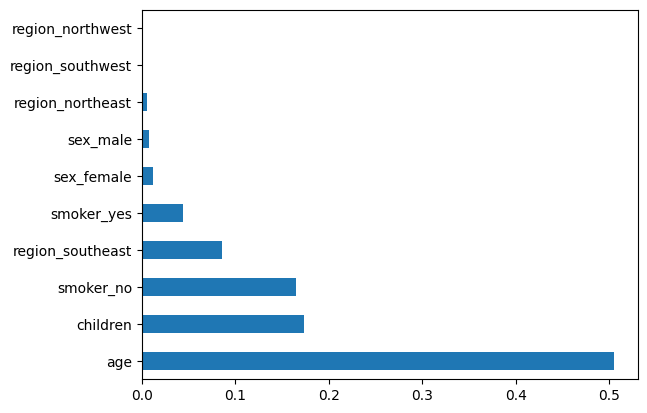

In [ ]:
# Adaboost (Boosting of multiple Decision Trees)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Choosing Decision Tree with 6 level as the weak learner
DTR=DecisionTreeRegressor(max_depth=3)
RegModel = AdaBoostRegressor(n_estimators=100, base_estimator=DTR ,learning_rate=0.04)

# Printing all the parameters of Adaboost
print(RegModel)

# Creating the model on Training Data
AB=RegModel.fit(X_train,y_train)
prediction=AB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, AB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['age']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['age'])
MedianMAPE=np.median(TestingDataResults['age'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)
R2 Value: 0.8514252903100086

##### Model Validation and Accuracy Calculations ##########
        age  children  sex_female  sex_male  smoker_no  smoker_yes  \
0  0.782609      0.25         0.0       1.0        0.0         1.0   
1  0.130435      0

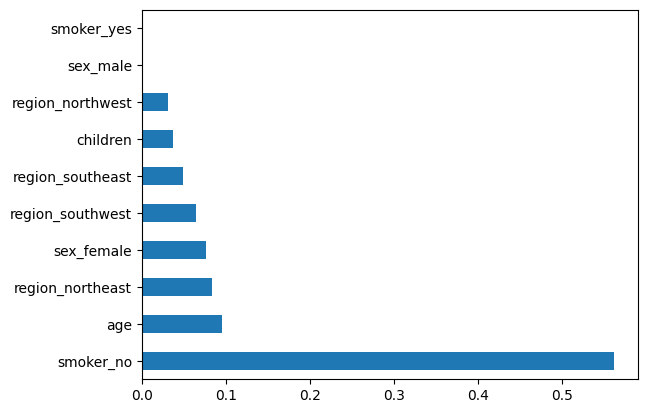

In [ ]:
##XGBoost
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['age']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])


MAPE=np.mean(TestingDataResults['age'])
MedianMAPE=np.median(TestingDataResults['age'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

<Axes: >

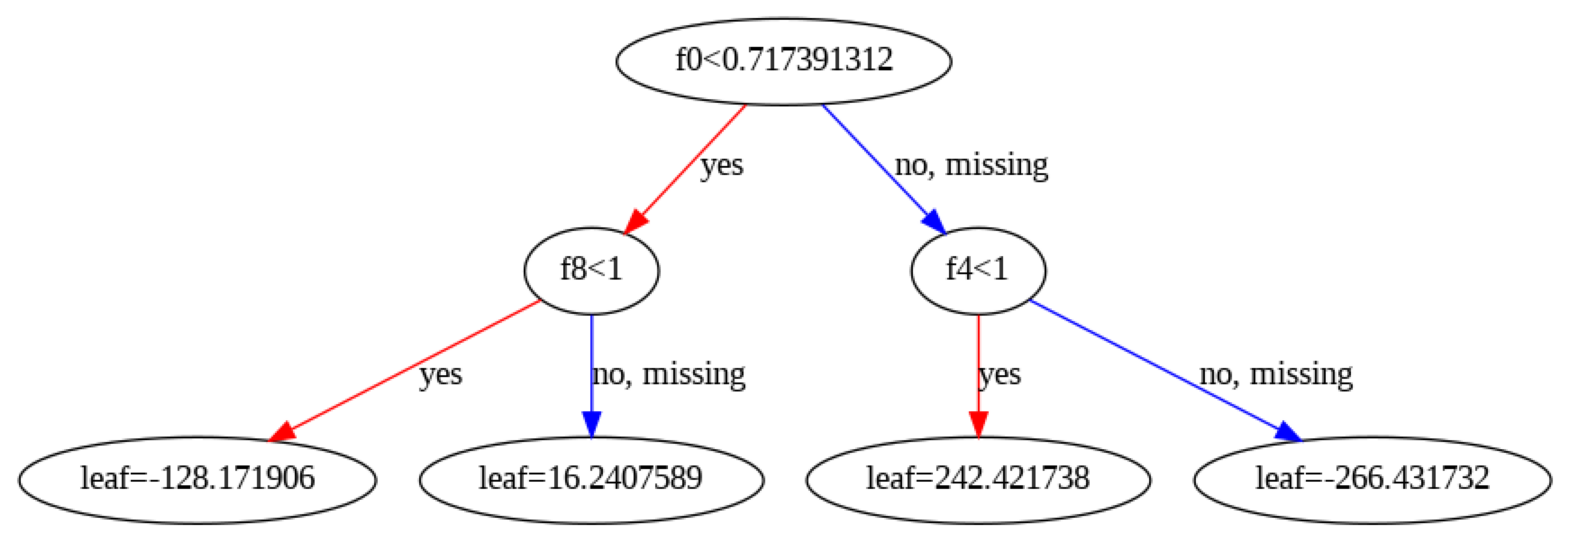

In [ ]:
#Plotting a single Decision tree out of XGBoost
from xgboost import plot_tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 8))
plot_tree(XGB, num_trees=10, ax=ax)

In [ ]:
#kNN
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults.head())

# Calculating the error for each row
TestingDataResults['age']=100 * ((abs(
  TestingDataResults['charges']-TestingDataResults['Predictedcharges']))/TestingDataResults['charges'])

MAPE=np.mean(TestingDataResults['age'])
MedianMAPE=np.median(TestingDataResults['age'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.7614135150962308

##### Model Validation and Accuracy Calculations ##########
        age  children  sex_female  sex_male  smoker_no  smoker_yes  \
0  0.782609      0.25         0.0       1.0        0.0         1.0   
1  0.130435      0.00         0.0       1.0        0.0         1.0   
2  0.565217      0.50         0.0       1.0        0.0         1.0   
3  0.152174      0.50         0.0       1.0        0.0         1.0   
4  0.891304      0.25         0.0       1.0        0.0         1.0   

   region_northeast  region_northwest  region_southeast  region_southwest  \
0               0.0               0.0               1.0               0.0   
1               0.0               0.0               0.0               1.0   
2               0.0               0.0               0.0               1.0   
3               0.0               0.0               1.0               0.0   
4               0.0               0.0               1.0              

#  Selection of the best Model
The accuracy score of of different model:
* Multiple Linear Regression: 93.27
* Adaboost: 92.83
* XGBoost: 94.31
* K-Nearest Neighbor(KNN):93.78

Hence, XGBoost is the best model

# Model deployment

In [ ]:
# Separate Target Variable and Predictor Variables
TargetVariable='charges'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['age', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(340, 10)
(340,)


# Cross validating the final model accuracy with less predictors

In [ ]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# choose from different tunable hyper parameters
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=2,
                      learning_rate=0.1,
                      n_estimators=1000,
                      objective='reg:linear',
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [93.60496935 95.07429575 93.92483739 94.10573816 94.82989922 93.60496935
 95.07429575 93.92483739 94.10573816 94.82989922]

Final Average Accuracy of the model: 94.31


# Step 22: Retraining the final model using 100% data

In [ ]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

# Step 23: Save the model as a serialized file which can be stored anywhere

In [ ]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()

print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: /content/drive/MyDrive/MyST1-CapstoneProject


# Step 24: Create a python function

In [ ]:
from re import IGNORECASE
# This Function can be called from any from any front end tool/website

def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]

    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input

    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    #InputData=InputData.append(DataForML, ignore_index=True)
    InputData = pd.concat([InputData, DataForML], ignore_index=True)

    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)

    # Maintaining the same order of columns as it was during the model training
    Predictors=['age', 'children', 'sex_female', 'sex_male', 'smoker_no', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest']

    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]

    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)

    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()

    # Genrating Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(PredictionResult)

# Step 25: Calling the function for some new data

In [ ]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(data=[[21,2,'male',True, 'northeast'],[45, 3,'female', True, 'northeast']],columns=['age','children','sex','smoker', 'region'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData=NewSampleData)

   age  children     sex  smoker     region
0   21         2    male    True  northeast
1   45         3  female    True  northeast


,Prediction
0,37603.398438
1,41736.992188


# Conclusion
* The Function FunctionPredictResult() can be used to produce the predictions for one or more new cases at a time.
* Hence, it can be scheduled using a batch job or cron job to run every night and generate predictions for all the medical insurance price tasks  in the platform /system.